<a href="https://colab.research.google.com/github/starohit/Machine-Learning/blob/main/FindingAndVisualisingMissingData(Titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
!pip install missingno

# Load data from our dataset file into a pandas dataframe
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
dataset = pd.read_csv('titanic.csv', index_col=False, sep=",", header=0)

# Let's take a look at the data
dataset.head()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-10-22 19:37:27--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.01s   

2022-10-22 19:37:27 (5.27 MB/s) - ‘titanic.csv’ saved [61194/61194]

--2022-10-22 19:37:27--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercon

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Shape tells us how many rows and columns we have
print(dataset.shape)

(891, 12)


In [5]:
# Calculate the number of empty cells in each column
# The following line consists of three commands. Try
# to think about how they work together to calculate
# the number of missing entries per column
missing_data = dataset.sum().isnull().to_frame()

# Rename column holding the sums
missing_data = missing_data.rename(columns={0:'Empty Cells'})

# Print the results
print(missing_data)

             Empty Cells
PassengerId        False
Survived           False
Pclass             False
Name               False
Sex                False
Age                False
SibSp              False
Parch              False
Ticket             False
Fare               False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


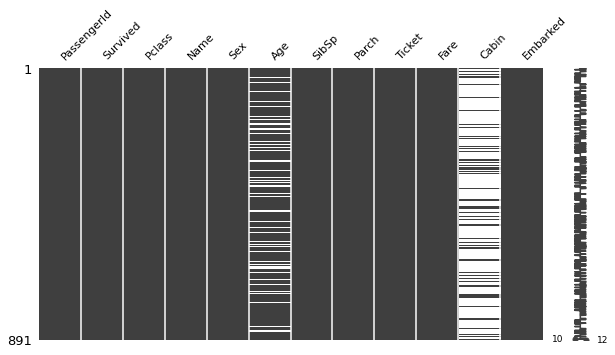

In [6]:
# import missingno package
import missingno as msno

# Plot a matrix chart, set chart and font size
msno.matrix(dataset, figsize=(10,5), fontsize=11)

In [7]:
# Select Passengers with unknown age
# Notice how we use .isnull() rows with no value
unknown_age = dataset[dataset["Age"].isnull()]

# Print only the colums we want for the moment (to better fit the screen)
# limit output to 20 rows
unknown_age[["PassengerId","Name", "Survived", "Age"]][:20]

,PassengerId,Name,Survived,Age
5,6,"Moran, Mr. James",0,NaN
17,18,"Williams, Mr. Charles Eugene",1,NaN
19,20,"Masselmani, Mrs. Fatima",1,NaN
26,27,"Emir, Mr. Farred Chehab",0,NaN
28,29,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN
29,30,"Todoroff, Mr. Lalio",0,NaN
31,32,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN
32,33,"Glynn, Miss. Mary Agatha",1,NaN
36,37,"Mamee, Mr. Hanna",1,NaN
42,43,"Kraeff, Mr. Theodor",0,NaN


In [8]:
# Find those missing age or cabin information
missing_age = dataset["Age"].isnull()
missing_cabin = dataset["Cabin"].isnull()

# Find those missing both
unknown_age_and_cabin = dataset[missing_age & missing_cabin]
print("Number of passengers missing age and cabin information:", len(unknown_age_and_cabin))

Number of passengers missing age and cabin information: 158


In [9]:
import graphing

# 'graphing' is custom code we use to make graphs quickly.
# If you would like to read it in detail, it can be found
# in our GitHub repository
graphing.histogram(dataset, 'Pclass', title='Ticket Class (All Passengers)', show=True)
graphing.histogram(unknown_age_and_cabin, 'Pclass', title='Ticket Class (Passengers Missing Cabin and Age Information)')

In [10]:
import numpy as np

# Print out the average age of passengers we have age data for
mean_age = np.mean(dataset.Age)
print("The average age on the ship was", mean_age, "years old")

# Now make another model where missing ages contained a 0
dataset['Age_2'] = dataset['Age'].fillna(0)
mean_age = np.mean(dataset.Age_2)
print("The average age on the ship was", mean_age, "years old")

The average age on the ship was 29.69911764705882 years old
The average age on the ship was 23.79929292929293 years old


In [11]:
graphing.histogram(dataset, label_x="Age_2")

In [12]:
# Create a "clean" dataset where we cumulatively fix missing values
# Start by removing rows ONLY where "Embarked" has no values
print(f"The original size of our dataset was", dataset.shape)
clean_dataset = dataset.dropna(subset=["Embarked"])
clean_dataset = clean_dataset.reindex()

# How many rows do we have now?
print("The shape for the clean dataset is", clean_dataset.shape)

The original size of our dataset was (891, 13)
The shape for the clean dataset is (889, 13)


In [13]:
# Calculate the mean value for the Age column
mean_age = clean_dataset["Age"].mean()

print("The mean age is", mean_age)

# Replace empty values in "Age" with the mean calculated above
clean_dataset["Age"].fillna(mean_age, inplace=True)

# Let's see what the clean dataset looks like now
print(clean_dataset.isnull().sum().to_frame().rename(columns={0:'Empty Cells'}))

The mean age is 29.64209269662921
             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               0
Age_2                  0


In [14]:
# Assign unknow to records where "Cabin" is empty
clean_dataset["Cabin"].fillna("Unknown", inplace=True)

# Let's see what the clean dataset looks like now
print(clean_dataset.isnull().sum().to_frame().rename(columns={0:'Empty Cells'}))

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Age_2                  0
